# pip & import

In [1]:
!pip install catboost

In [2]:
!pip install micropip

In [3]:
!pip install matplotlib-venn

In [4]:
#hiddencell
import micropip
await micropip.install("seaborn")

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

In [5]:
import os
import random
import numpy as np
import pandas as pd

In [6]:
!rm -rf ~/.cache/matplotlib
!sudo apt-get install fonts-nanum
!sudo fc-cache -fv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [8]:
plt.rc('font', family='NanumBarunGothic')
# 한글 폰트 사용 시 마이너스 폰트 깨짐 방지
plt.rc('axes', unicode_minus=False)

# **대구 교통 사고 피해 예측 AI 경진대회**

## seed 고정 & 함수 정의


In [9]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [10]:
holi_weekday = ['2019-01-01', '2019-02-04', '2019-02-05', '2019-02-06', '2019-03-01', '2019-05-05', '2019-05-12', '2019-06-06', '2019-08-15', '2019-09-12', '2019-09-13', '2019-09-14', '2019-10-03', '2019-10-09', '2019-12-25',
                '2020-01-01' ,'2020-01-24' ,'2020-01-25', '2020-01-26', '2020-03-01', '2020-04-30', '2020-05-05', '2020-06-06', '2020-08-15', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25',
                '2021-01-01' ,'2021-02-11' ,'2021-02-12', '2021-02-13', '2021-03-01', '2021-05-05', '2021-05-19', '2021-06-06', '2021-08-15', '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-03', '2021-10-09', '2021-12-25',
                '2022-01-01' ,'2022-01-31' ,'2022-02-01', '2022-02-02', '2022-03-01', '2022-05-05', '2022-05-08', '2022-06-06', '2022-08-15', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09', '2020-10-10', '2022-12-25',
                '2023-01-01' ,'2023-01-21' ,'2023-01-22', '2023-01-23', '2023-01-24', '2023-03-01']

## 데이터 불러오기



In [150]:
train_org = pd.read_csv('train.csv')
test_org = pd.read_csv('test.csv')
sample_submission = pd.read_csv("sample_submission.csv")

In [151]:
train_df = train_org.copy()
test_df = test_org.copy()

In [152]:
train_df['시'] = train_df['시군구'].apply(lambda x: x.split()[0] if len(x.split()) > 0 else '')
train_df['군'] = train_df['시군구'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else '')
train_df['구'] = train_df['시군구'].apply(lambda x: x.split()[2] if len(x.split()) > 2 else '')

## **데이터 전처리**  

현재 '사고일시', '시군구', '도로형태' 컬럼은 반복되는 패턴으로 여러 정보를 포함하고 있습니다
이런 반복되는 패턴을 일반화하면 pandas에서 제공하는 str.extract를 통해 한 번에 추출 가능합니다  

## **파생 변수 생성 1 : 날짜, 시간정보 생성**

'사고일시' 컬럼으로 부터 연도, 월, 일, 시간 정보 추출 및 변환 합니다

In [153]:
time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다

# 해당 과정을 test_x에 대해서도 반복해줍니다
test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',\n       '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '시', '군', '구', '연', '월', '일', '시간'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간'], dtype='object')"

In [154]:
train_df['timestamp'] = pd.to_datetime(train_df[['연', '월', '일']].astype(str).agg('-'.join, axis=1))
train_df['holiday'] = (train_df['timestamp'].dt.dayofweek == 6).astype(int)
train_df['holiday'] = (train_df['timestamp'].dt.dayofweek == 5).astype(int)
train_df['holiday'] = train_df['timestamp'].isin(holi_weekday).astype(int)

test_df['timestamp'] = pd.to_datetime(test_df[['연', '월', '일']].astype(str).agg('-'.join, axis=1))
test_df['holiday'] = (test_df['timestamp'].dt.dayofweek == 6).astype(int)
test_df['holiday'] = (test_df['timestamp'].dt.dayofweek == 5).astype(int)
test_df['holiday'] = test_df['timestamp'].isin(holi_weekday).astype(int)

## **파생 변수 생성 2 : 공간(위치) 정보 생성**

'시군구' 컬럼으로부터 의미 있는 공산 정보를 추출 및 변환 합니다

In [155]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반',\n       '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '시', '군', '구', '연', '월', '일', '시간', 'timestamp', 'holiday',\n       '도시', '동'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간',\n       'timestamp', 'holiday', '도시', '구', '동'],\n      dtype='object')"

## **파생 변수 추출 3 : 도로 형태 정보 추출**  

'도로형태' 컬럼은 '단일로 - 기타'와 같은 패턴으로 구성되어 있습니다. 이를 두종류의 독립된 정보로 보고 두개의 컬럼으로 분리하여 생성합니다.

In [156]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',\n       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',\n       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '시',\n       '군', '구', '연', '월', '일', '시간', 'timestamp', 'holiday', '도시', '동',\n       '도로형태1', '도로형태2'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', 'timestamp',\n       'holiday', '도시', '구', '동', '도로형태1', '도로형태2'],\n      dtype='object')"

In [157]:
test_df.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', 'timestamp',
       'holiday', '도시', '구', '동', '도로형태1', '도로형태2'],
      dtype='object')

### 사망자수 0과 1로 변경

In [169]:
mask = train_df['사망자수'] >= 1
train_df['사망자수'] = 0  # 새로운 열 생성
train_df.loc[mask, '사망자수'] = 1

In [170]:
train_df['사망자수'].value_counts()

0    39309
1      300
Name: 사망자수, dtype: int64

### 시간대 범주화

In [185]:
# 시간대 별로 구분. 0-6시, 6-12시, 12-18시, 18-24시
bins = [0, 6, 12, 18, 24]
labels = ['새벽', '오전', '오후', '저녁']
train_df['시간대'] = pd.cut(train_df['시간'], bins=bins, labels=labels, include_lowest=True)
test_df['시간대'] = pd.cut(test_df['시간'], bins=bins, labels=labels, include_lowest=True)

In [186]:
train_df['시간대'] = train_df['시간대'].astype('object')
test_df['시간대'] = test_df['시간대'].astype('object')

## train, test 데이터의 독립변수, 종속 변수 분리, feature 정의



In [222]:
test_features2 = test_df.drop(columns=['ID', '일', 'timestamp', '도시', '요일','기상상태','시간','구']).copy()
train_features2 = train_df[test_features2.columns].copy()
train_target2 = train_df['사망자수'].copy()

## **범주형(Categorical) 변수, 수치형 변수로 변환하기**

모델 학습을 위해 train_x의 문자열 타입의 컬럼들을 추출하고, LabelEncoder를 활용하여 이 컬럼들을 모두 수치형 변수로 변환해 보겠습니다

In [223]:
from sklearn.preprocessing import LabelEncoder

categorical_features2 = list(train_features2.dtypes[train_features2.dtypes == "object"].index)
# 추출된 문자열 변수 확인
display(categorical_features2)

for i in categorical_features2:
    le = LabelEncoder()
    le=le.fit(train_features2[i])
    train_features2[i]=le.transform(train_features2[i])

    for case in np.unique(test_features2[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    test_features2[i]=le.transform(test_features2[i])

display(train_features2.head())
display(test_features2.head())

['노면상태', '사고유형', '동', '도로형태1', '도로형태2', '시간대']

,노면상태,사고유형,연,월,holiday,동,도로형태1,도로형태2,시간대
0,0,0,2019,1,1,40,2,5,0
1,0,0,2019,1,1,4,2,5,0
2,0,0,2019,1,1,66,2,5,0
3,0,1,2019,1,1,79,2,5,0
4,0,1,2019,1,1,129,2,5,0


,노면상태,사고유형,연,월,holiday,동,도로형태1,도로형태2,시간대
0,0,0,2022,1,1,99,0,3,0
1,0,0,2022,1,1,168,2,5,0
2,0,1,2022,1,1,117,0,3,0
3,0,1,2022,1,1,126,2,5,0
4,0,1,2022,1,1,4,0,3,0


## **Model Train & Prediction**

## K-Fold

In [224]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

In [225]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [226]:
# 교차 검증
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

## XGBoost

### model 2

In [245]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

hp = {
    "random_state" : 42,
}
xgb_model2 = XGBClassifier(**hp)

In [246]:
from sklearn.metrics import get_scorer_names

print(get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [247]:
n_iter=1 # 몇번 hp조합을 찾을 것인가?
scoring = 'f1' # 어떤 평가지표를 사용할 것인가?
hp={
    "max_depth" : np.linspace(5,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(800,1200,200, dtype = int), # 부스팅 단계수
    "learning_rate" : np.logspace(-3, -1, 3)
}

# HPO 인스턴스 생성
rs1=RandomizedSearchCV(xgb_model2, hp, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=False)
# 학습 (best hp 조합 찾기)
rs1.fit(train_features, train_target)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

0.0

In [248]:
best_params = rs1.best_params_
best_params

{'n_estimators': 998, 'max_depth': 6, 'learning_rate': 0.01}

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

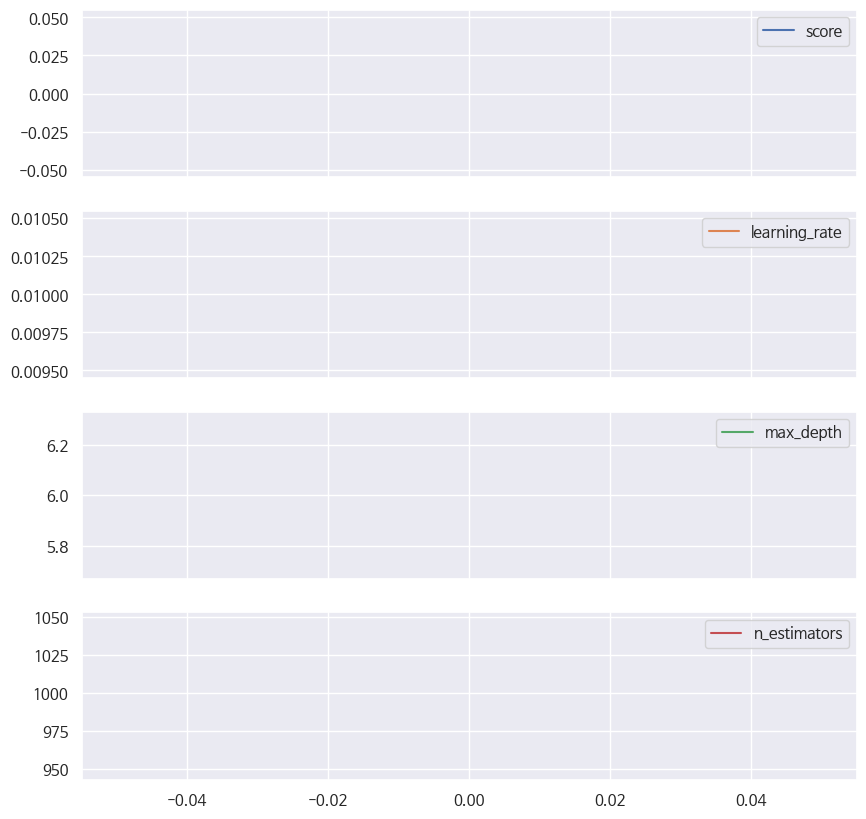

In [249]:
rs_results_df=pd.DataFrame(np.transpose([rs1.cv_results_['mean_test_score'],
                                         rs1.cv_results_['param_learning_rate'].data,
                                         rs1.cv_results_['param_max_depth'].data,
                                         rs1.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'max_depth', 'n_estimators'])
rs_results_df.plot(subplots=True,figsize=(10, 10))

In [250]:
best_params['random_state'] = 42

# best 모델 인스턴스 생성(정의)
xgb_model2 = XGBClassifier(**best_params)

In [251]:
seed_everything(42)
n_iter = 0
f1_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  xgb_model2.fit(train_x, train_y)
  valid_pred = xgb_model2.predict(valid_x) # 예측값

  # 평가
  f1 = f1_score(valid_y, valid_pred, average='micro')
  f1_lst.append(f1)
  print(f'{n_iter} 번째 Stratified K-Fold f1: {f1}')

# 최종 평가
print('-'*50)
print(f'교차 검증 f1: {np.mean(f1_lst)}')

1 번째 Stratified K-Fold f1: 0.9923263327948304
2 번째 Stratified K-Fold f1: 0.9925267622702484
3 번째 Stratified K-Fold f1: 0.9925267622702484
4 번째 Stratified K-Fold f1: 0.9925267622702484
5 번째 Stratified K-Fold f1: 0.9925267622702484
6 번째 Stratified K-Fold f1: 0.9923247828721471
7 번째 Stratified K-Fold f1: 0.9921228034740457
8 번째 Stratified K-Fold f1: 0.9923247828721471
--------------------------------------------------
교차 검증 f1: 0.9924007188867705


## Light GBM


### model 2

In [227]:
from lightgbm import LGBMClassifier, plot_importance

hp = {
    "random_state" : 42,
    "verbose": -1, # 로그
}
lgb_model2 = LGBMClassifier(**hp)

In [228]:
n_iter=3 # 몇번 hp조합을 찾을 것인가?
scoring = 'f1' # 어떤 평가지표를 사용할 것인가?
hp={
    "max_depth" : np.linspace(5,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(800,1200,100, dtype = int), # 부스팅 단계수
    "learning_rate" : np.logspace(-3, -1, 3)
}

# HPO 인스턴스 생성
rs1=RandomizedSearchCV(lgb_model2, hp, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=False)
# 학습 (best hp 조합 찾기)
rs1.fit(train_features2, train_target2)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

0.014953460769615193

In [229]:
best_params = rs1.best_params_
best_params

{'n_estimators': 989, 'max_depth': 9, 'learning_rate': 0.1}

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

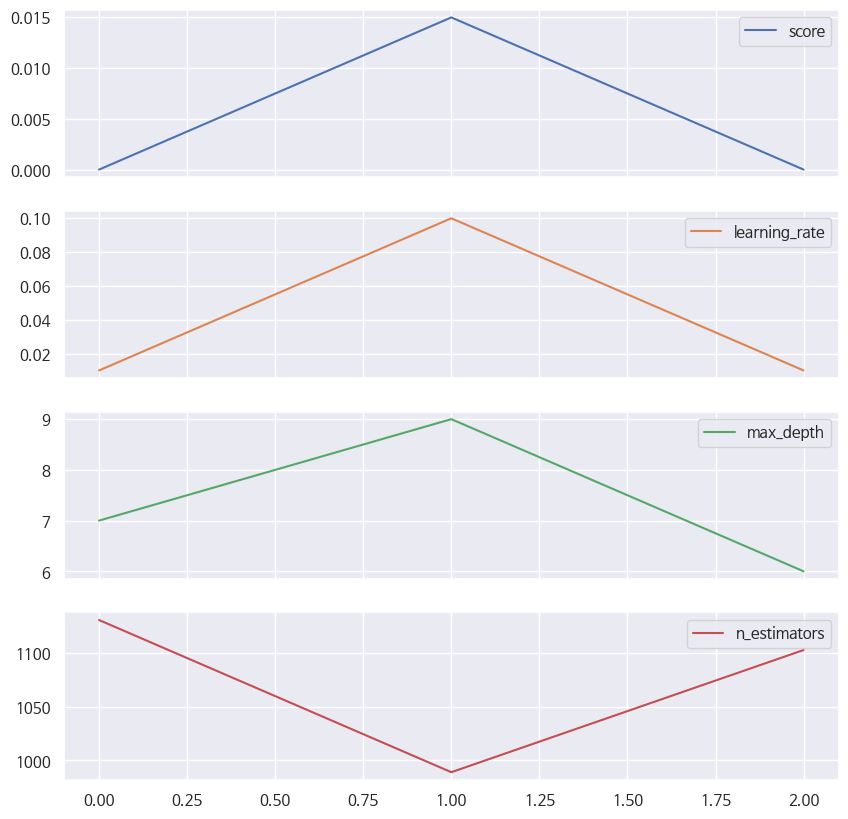

In [230]:
rs_results_df=pd.DataFrame(np.transpose([rs1.cv_results_['mean_test_score'],
                                         rs1.cv_results_['param_learning_rate'].data,
                                         rs1.cv_results_['param_max_depth'].data,
                                         rs1.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'max_depth', 'n_estimators'])
rs_results_df.plot(subplots=True,figsize=(10, 10))

In [231]:
best_params['random_state'] = 42
best_params['verbose'] = -1

# best 모델 인스턴스 생성(정의)
lgb_model2 = LGBMClassifier(**best_params)

In [232]:
n_iter = 0
accuracy_lst = []
f1_lst = []

for train_index, valid_index in skf.split(train_features2, train_target2):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features2.iloc[train_index], train_features2.iloc[valid_index]
  train_y, valid_y = train_target2.iloc[train_index], train_target2.iloc[valid_index]

  # 학습
  lgb_model2.fit(train_x, train_y)
  valid_pred = lgb_model2.predict(valid_x) # 예측값

  # 평가
  f1 = f1_score(valid_y, valid_pred, average='micro')
  f1_lst.append(f1)
  print(f'{n_iter} 번째 Stratified K-Fold f1: {f1}')

# 최종 평가
print('-'*50)
print(f'교차 검증 f1: {np.mean(f1_lst)}')

1 번째 Stratified K-Fold f1: 0.9907108239095315
2 번째 Stratified K-Fold f1: 0.9911129064835387
3 번째 Stratified K-Fold f1: 0.9886891537063219
4 번째 Stratified K-Fold f1: 0.9917188446778429
5 번째 Stratified K-Fold f1: 0.9907089476873359
6 번째 Stratified K-Fold f1: 0.9899010300949304
7 번째 Stratified K-Fold f1: 0.9899010300949304
8 번째 Stratified K-Fold f1: 0.9911129064835387
--------------------------------------------------
교차 검증 f1: 0.9904819553922463


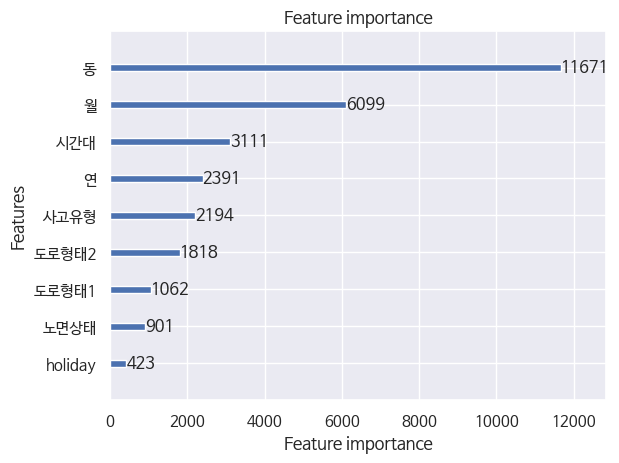

In [233]:
plot_importance(lgb_model2)
plt.show()

## Catboost

### model 2

In [236]:
from catboost import CatBoostClassifier
hp = {
    "random_state" : 42,
    "verbose": 0, # 로그
}
cat_model2 = CatBoostClassifier(**hp)

In [237]:
n_iter=3 # 몇번 hp조합을 찾을 것인가?
scoring = 'f1' # 어떤 평가지표를 사용할 것인가?
hp={
    "max_depth" : np.linspace(5,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(100,500,100, dtype = int), # 부스팅 단계수
    "learning_rate" : np.logspace(-3, -1, 3)
}

# HPO 인스턴스 생성
rs1=RandomizedSearchCV(cat_model2, hp, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=False)
# 학습 (best hp 조합 찾기)
rs1.fit(train_features, train_target)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

0.0

In [238]:
best_params = rs1.best_params_
best_params

{'n_estimators': 124, 'max_depth': 7, 'learning_rate': 0.1}

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

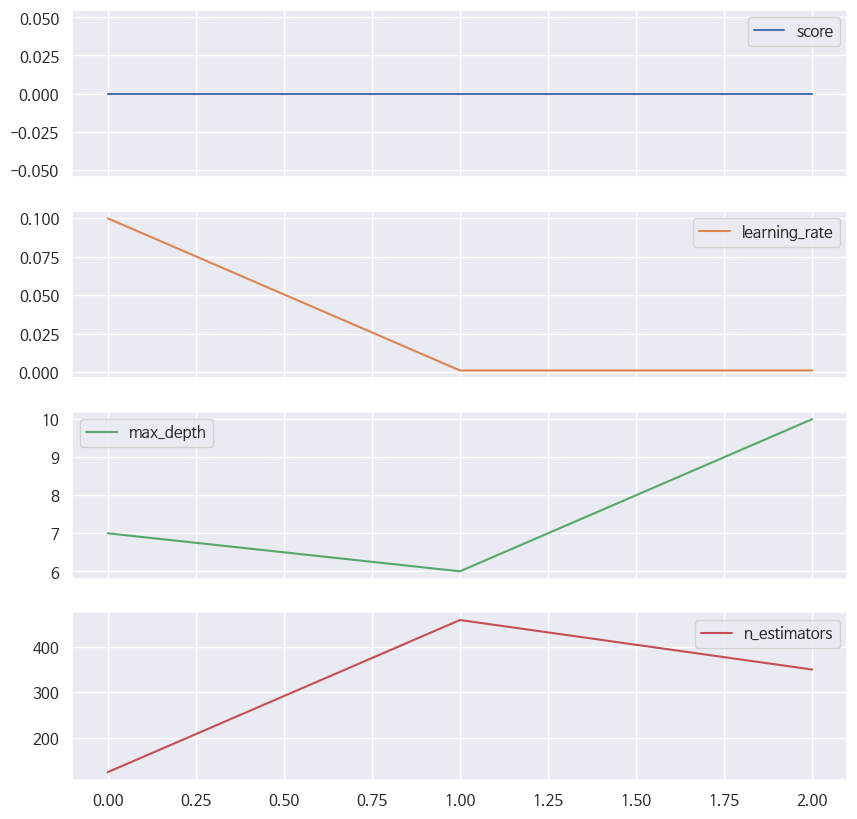

In [239]:
rs_results_df=pd.DataFrame(np.transpose([rs1.cv_results_['mean_test_score'],
                                         rs1.cv_results_['param_learning_rate'].data,
                                         rs1.cv_results_['param_max_depth'].data,
                                         rs1.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'max_depth', 'n_estimators'])
rs_results_df.plot(subplots=True,figsize=(10, 10))

In [240]:
best_params['random_state'] = 42
best_params['verbose'] = 0

# best 모델 인스턴스 생성(정의)
cat_model2 = CatBoostClassifier(**best_params)

In [241]:
n_iter = 0
accuracy_lst = []
f1_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  cat_model2.fit(train_x, train_y)
  valid_pred = cat_model2.predict(valid_x) # 예측값

  # 평가
  f1 = f1_score(valid_y, valid_pred, average='micro')
  f1_lst.append(f1)
  print(f'{n_iter} 번째 Stratified K-Fold f1: {f1}')

# 최종 평가
print('-'*50)
print(f'교차 검증 f1: {np.mean(f1_lst)}')

1 번째 Stratified K-Fold f1: 0.9923263327948304
2 번째 Stratified K-Fold f1: 0.9925267622702484
3 번째 Stratified K-Fold f1: 0.9925267622702484
4 번째 Stratified K-Fold f1: 0.9925267622702484
5 번째 Stratified K-Fold f1: 0.9925267622702484
6 번째 Stratified K-Fold f1: 0.9923247828721471
7 번째 Stratified K-Fold f1: 0.9923247828721471
8 번째 Stratified K-Fold f1: 0.9923247828721471
--------------------------------------------------
교차 검증 f1: 0.9924259663115331


Text(0.5, 1.0, 'Feature Importance')

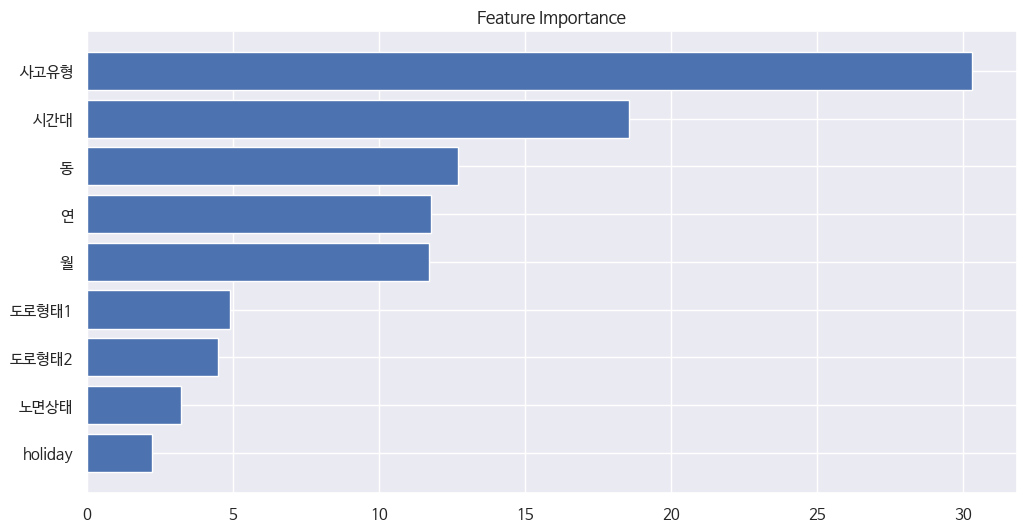

In [242]:
feature_importance = cat_model2.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(range(len(train_x)))[sorted_idx])
# 변수명이 있다면, 아래와 같이...
plt.yticks(range(len(sorted_idx)), np.array(train_x.columns)[sorted_idx])
plt.title('Feature Importance')

## RandomForest

### model 2

In [87]:
from sklearn.ensemble import RandomForestClassifier
rfr_hp2 = {
    "random_state" : 42,
    "verbose": 0, # 로그
}
rfr_model2 = RandomForestClassifier(**rfr_hp2)

In [88]:
n_iter=5 # 몇번 hp조합을 찾을 것인가?
scoring = 'f1' # 어떤 평가지표를 사용할 것인가?
rfr_hp2={
    "max_depth" : np.linspace(5,12,8,dtype = int), # 깊이
    "n_estimators" : np.linspace(100,500,100, dtype = int), # 부스팅 단계수
}

# HPO 인스턴스 생성
rs1 = RandomizedSearchCV(rfr_model2, rfr_hp2, scoring=scoring, n_iter=n_iter, n_jobs=-1, cv=skf, verbose=3)
# 학습 (best hp 조합 찾기)
rs1.fit(train_features, train_target)

# 학습 결과 (best hp 조합일 때,)
rs1.best_score_

Fitting 8 folds for each of 5 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


nan

In [89]:
rfr_best_params = rs1.best_params_
rfr_best_params

{'n_estimators': 108, 'max_depth': 6}

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

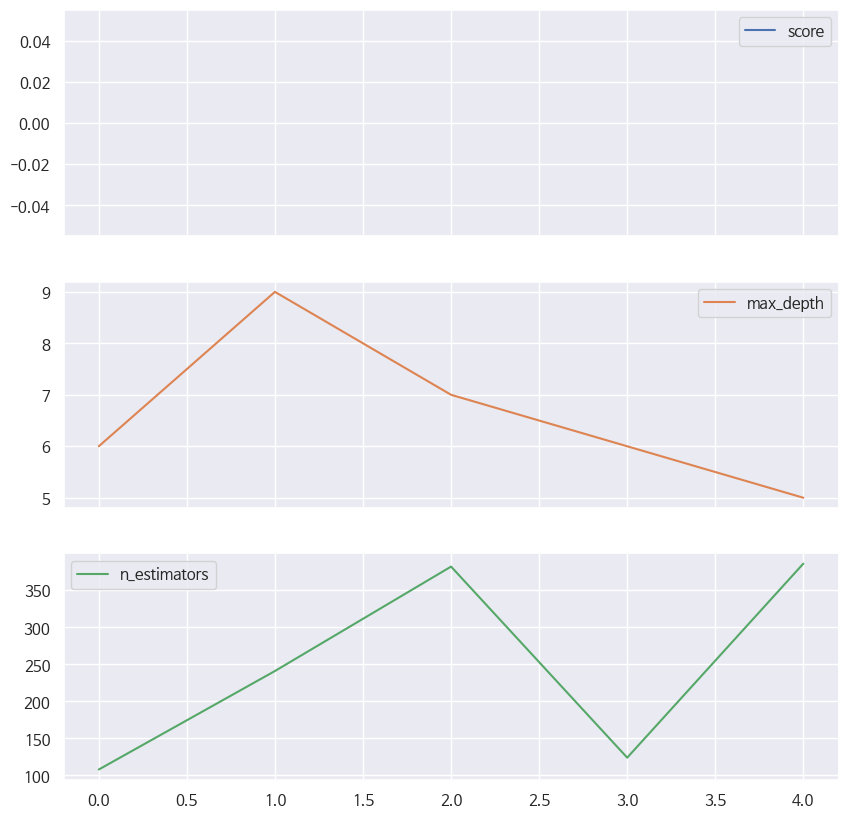

In [90]:
rs_results_df=pd.DataFrame(np.transpose([rs1.cv_results_['mean_test_score'],
                                         rs1.cv_results_['param_max_depth'].data,
                                         rs1.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'max_depth', 'n_estimators'])
rs_results_df.plot(subplots=True,figsize=(10, 10))

In [91]:
rfr_best_params['random_state'] = 42
rfr_best_params['verbose'] = 0

# best 모델 인스턴스 생성(정의)
rfr_model2 = RandomForestClassifier(**rfr_best_params)

In [92]:
n_iter = 0
accuracy_lst = []
f1_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
  n_iter += 1
  # 학습용, 검증용 데이터 구성
  train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
  train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

  # 학습
  rfr_model2.fit(train_x, train_y)
  valid_pred = rfr_model2.predict(valid_x) # 예측값

  # 평가
  f1 = f1_score(valid_y, valid_pred, average='micro')
  f1_lst.append(f1)
  print(f'{n_iter} 번째 Stratified K-Fold f1: {f1}')

# 최종 평가
print('-'*50)
print(f'교차 검증 f1: {np.mean(f1_lst)}')

1 번째 Stratified K-Fold f1: 0.9923263327948304
2 번째 Stratified K-Fold f1: 0.9925267622702484
3 번째 Stratified K-Fold f1: 0.9925267622702484
4 번째 Stratified K-Fold f1: 0.9925267622702484
5 번째 Stratified K-Fold f1: 0.9925267622702484
6 번째 Stratified K-Fold f1: 0.9923247828721471
7 번째 Stratified K-Fold f1: 0.9923247828721471
8 번째 Stratified K-Fold f1: 0.9923247828721471
--------------------------------------------------
교차 검증 f1: 0.9924259663115331


# Voting

In [58]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier 정의
# Voting Classifier 정의
voting_reg = VotingClassifier(estimators=[
    ('xgb', xgb_model2),
    ('cat', cat_model2),
    ('lgb', lgb_model2),
    ('forest', rfr_model2)
], voting='soft')

n_iter = 0
f1_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
    n_iter += 1
    # 학습용, 검증용 데이터 구성
    train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
    train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

    # Voting Classifier 학습
    voting_reg.fit(train_x, train_y)

    # 검증 데이터에 대한 예측
    valid_pred = voting_reg.predict(valid_x)

    # 평가
    f1 = f1_score(valid_y, valid_pred, average='micro')
    f1_lst.append(f1)
    print(f'{n_iter} 번째 Stratified K-Fold f1: {f1}')

# 최종 평가
print('-'*50)
print(f'교차 검증 f1: {np.mean(f1_lst)}')

1 번째 Stratified K-Fold f1: 0.9923263327948304
2 번째 Stratified K-Fold f1: 0.9925267622702484
3 번째 Stratified K-Fold f1: 0.9925267622702484
4 번째 Stratified K-Fold f1: 0.9925267622702484
5 번째 Stratified K-Fold f1: 0.9925267622702484
6 번째 Stratified K-Fold f1: 0.9923247828721471
7 번째 Stratified K-Fold f1: 0.9923247828721471
8 번째 Stratified K-Fold f1: 0.9923247828721471
--------------------------------------------------
교차 검증 f1: 0.9924259663115331


In [59]:
voting_reg

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            multi_strategy=None,
                                            n_estimators=920, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7b03101a9960>),
                             ('lgb',
                              LGBMClassifier(learning_rate=0.01, max_depth=5,
                                             n_estimators=1042, random_state=42,
                                             verbose=-1)),
                             ('forest',
                              RandomForestClassifier(max_depth=9,
                                                     n_estimators=366,
                                                     random_state=42))],
                 voting='soft')

In [61]:
pred = voting_reg.predict(train_x)

# f1 계산
f1 = f1_score(train_y, pred, average='micro')
print(f'f1: {f1}')

f1: 0.9924981245311327


In [63]:
pred_df = pd.DataFrame(pred, columns=['사망자수'])

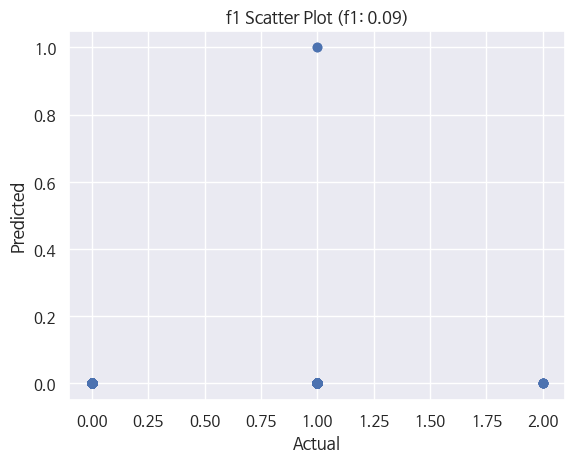

In [64]:
import matplotlib.pyplot as plt

# train_y와 pred의 f1를 계산
f1 = np.sqrt(mean_squared_error(train_y, pred))

# 산포도 그래프 생성
plt.scatter(train_y, pred)

# 그래프에 제목과 x축, y축 레이블 추가
plt.title(f'f1 Scatter Plot (f1: {f1:.2f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# 그래프 표시
plt.show()

## **Submission 양식 확인**

sample_submission.csv file 데이터(sample_submission)를 그대로 복사한 후,
양식의 'ECLO' 컬럼에 test_x에 대한 ECLO(y) 예측값을 입력합니다

In [65]:
prediction =  voting_reg.predict(test_features)

In [ ]:
baseline_submission = sample_submission.copy()
baseline_submission.rename(columns={'ECLO': '사망자수'}, inplace=True)
baseline_submission['사망자수'] = prediction
baseline_submission

In [71]:
baseline_submission['사망자수'].value_counts()

0    10963
Name: 사망자수, dtype: int64

## **답안지 저장 및 제출하기**

In [ ]:
baseline_submission.to_csv('Voting_Submission.csv', index=False)

## 다른거

In [254]:
prediction00 =  lgb_model00.predict(test_features2)
baseline_submission['사망자수'] = prediction

In [255]:
baseline_submission['사망자수'].value_counts()

0    10946
1       17
Name: 사망자수, dtype: int64